In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
import datetime

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls '/content/gdrive/My Drive/Colab Notebooks/'

Datasets  RetailPricePrediction.ipynb  Untitled1.ipynb	Untitled2.ipynb


In [6]:
Data_dir = '/content/gdrive/My Drive/Colab Notebooks/Datasets/MahineHack - Retail Price Prediction/'
df = pd.read_csv(Data_dir+ 'Train.csv')
test_data = pd.read_csv(Data_dir + 'Test.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [7]:
def df_trans(train):
  train['Date'] = train['InvoiceDate'].apply(lambda x: x.split(' ')[0])
  train['InvoiceDate'] = pd.to_datetime(train['InvoiceDate'])
  train['Year'] = train['InvoiceDate'].dt.year
  train['Month'] = train['InvoiceDate'].dt.month
  train['Day'] = train['InvoiceDate'].dt.day
  train['Time'] = train['InvoiceDate'].dt.time 
  train['Timelight'] = train['Time'].apply(lambda x : 'Morning' if 6<=x.hour<12 else ('Noon' if 12<=x.hour<18 else 'Night' ))
  day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
  train['Weekday'] = train['Date'].apply(lambda x: day_name[datetime.datetime.strptime(x, '%Y-%m-%d').weekday()])
  train1 = train.copy()
  train1.drop(['InvoiceDate','Time'],axis = 1,inplace=True)
  #train['Quantity'] = abs(train['Quantity']))
  return train1

df1 = df_trans(df)

In [ ]:
df1.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day
count,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000
mean,9955.394083,1573.386807,2023.955573,12.028468,3.451216,15288.224278,32.823846,2010.933910,7.612922,15.030318
std,5551.519138,843.604991,1089.812078,295.111588,78.399541,1714.336529,6.743602,0.248439,3.415785,8.652114
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000,2010.000000,1.000000,1.000000
25%,5069.000000,939.000000,1141.000000,2.000000,1.250000,13953.000000,35.000000,2011.000000,5.000000,7.000000
50%,10310.000000,1521.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000,2011.000000,8.000000,15.000000
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000,2011.000000,11.000000,22.000000
max,22188.000000,3683.000000,3895.000000,80995.000000,38970.000000,18287.000000,36.000000,2011.000000,12.000000,31.000000


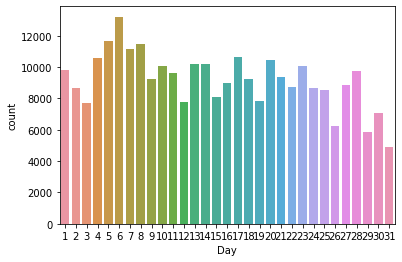

In [ ]:
# let see count frequency based on days,months,years
sns.countplot(x='Day',data=df1)
# maybe shopping spree decrease towards the end of the month and increases in the beginning of month.

(array([84319., 65222., 75313., 59926.]),
 array([ 1. ,  8.5, 16. , 23.5, 31. ]),
 <a list of 4 Patch objects>)

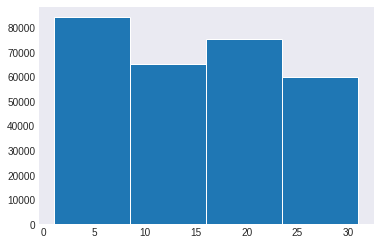

In [ ]:
style.use('seaborn-dark')
plt.hist(df1['Day'],bins=4,edgecolor='white')
# So we can divide day column into 4 categories

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    284780 non-null  int64  
 1   StockCode    284780 non-null  int64  
 2   Description  284780 non-null  int64  
 3   Quantity     284780 non-null  int64  
 4   UnitPrice    284780 non-null  float64
 5   CustomerID   284780 non-null  float64
 6   Country      284780 non-null  int64  
 7   Date         284780 non-null  object 
 8   Year         284780 non-null  int64  
 9   Month        284780 non-null  int64  
 10  Day          284780 non-null  int64  
 11  Timelight    284780 non-null  object 
 12  Weekday      284780 non-null  object 
dtypes: float64(2), int64(8), object(3)
memory usage: 28.2+ MB


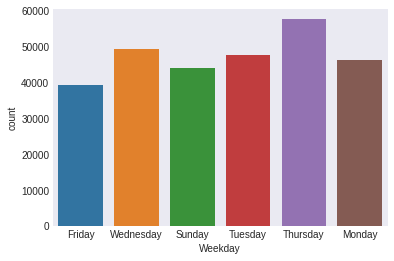

In [ ]:
#Let see frequency of buying acc to day
sns.countplot(x='Weekday',data=df1)
#From friday to Thursday shopping gradually increases with peak on Thursday

In [ ]:
df1.Weekday.str.contains('Saturday').any()
#there`s not a single record for saturday, maybe it`s a holiday

False

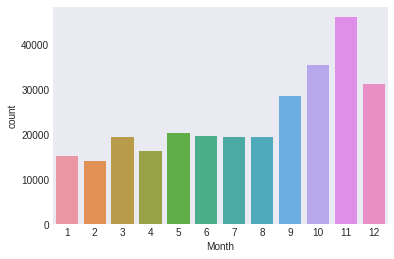

In [ ]:
#Let see frequency of buying acc to month
sns.countplot(x='Month',data=df1)

(array([29374., 35648., 39799., 38705., 63973., 77281.]),
 array([ 1.        ,  2.83333333,  4.66666667,  6.5       ,  8.33333333,
        10.16666667, 12.        ]),
 <a list of 6 Patch objects>)

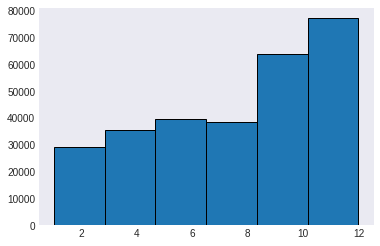

In [ ]:
style.use('seaborn-dark')
plt.hist(df1['Month'],bins=6,edgecolor='Black')
#can distribute month into 6 divisions

In [ ]:
#lets divide time, as daylight and night


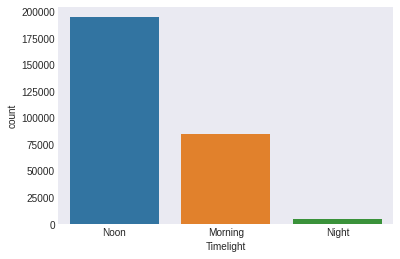

In [ ]:
#Let see frequency of buying acc to month
sns.countplot(x='Timelight',data=df1)

In [ ]:
#sns.countplot(x='Country',data=df1)
df1.Country.value_counts()[0:10]
#Divide country into 5 segments

35    253253
14      6653
13      5946
10      5244
30      1776
23      1680
3       1435
32      1293
26      1049
0        883
Name: Country, dtype: int64

In [ ]:
print("There are " + str(df1.Country.nunique()) + " unique countries")
print("There are " + str(df1.Description.nunique()) + " unique Description")
print("There are " + str(df1.StockCode.nunique()) + " unique StockCode")
print("There are " + str(df1.CustomerID.nunique()) + " unique CustomerID")
print("There are " + str(df1.InvoiceNo.nunique()) + " unique InvoiceNo")

There are 37 unique countries
There are 3819 unique Description
There are 3619 unique StockCode
There are 4339 unique CustomerID
There are 20971 unique InvoiceNo


In [ ]:
df1.StockCode.value_counts()[0:5]

3249    1478
1292    1292
3235    1172
3069     998
170      997
Name: StockCode, dtype: int64

Text(0.5, 1.0, '3235-Days Histogram')

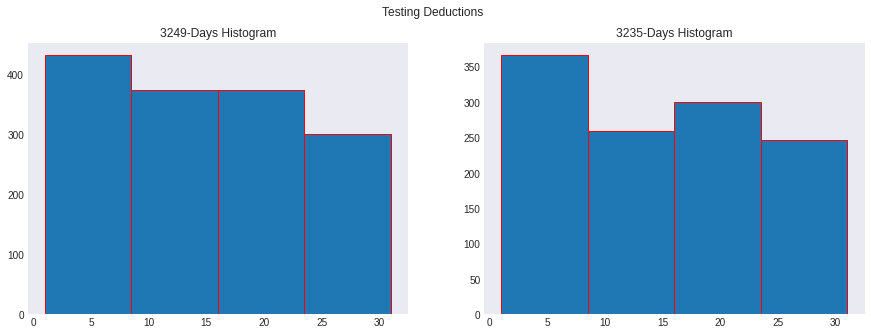

In [ ]:
# Lets see if for a same product price varies in diff countries,Months,Weekdays, try with stockcode=3249, test your deductions with stockcode=3235
style.use('seaborn-dark')
df_prod = df1[df1.StockCode==3249]
#df_prod.head()
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Testing Deductions')
ax1.hist(df_prod['Day'],bins=4,edgecolor='red')
ax1.set_title('3249-Days Histogram')
ax2.hist(df1[df1.StockCode==3235]['Day'],bins=4,edgecolor='red')
ax2.set_title('3235-Days Histogram')
# Shopping spree decreses with days, with high at month start probably due to salary

Text(0.5, 1.0, '3235-DaysvsPrice Histogram')

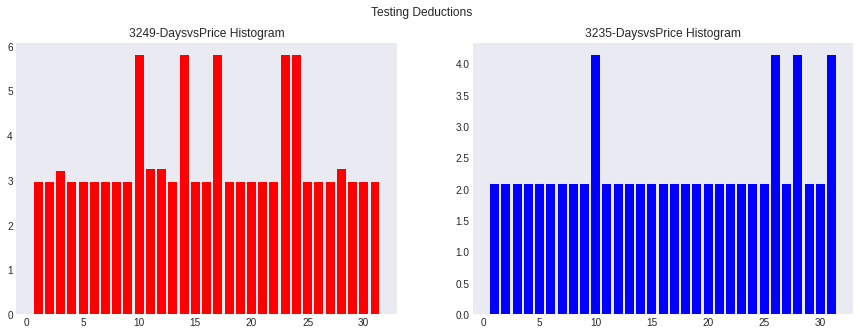

In [ ]:
style.use('seaborn-dark')
df_prod1 = df1[df1.StockCode==3249]
df_prod2 = df1[df1.StockCode==3235]
#df_prod.head()
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Testing Deductions')
ax1.bar(df_prod1['Day'],df_prod1['UnitPrice'],color=['red'])
ax1.set_title('3249-DaysvsPrice Histogram')
ax2.bar(df_prod2['Day'],df_prod2['UnitPrice'],color='blue')
ax2.set_title('3235-DaysvsPrice Histogram')
#Some abrupt price hikes on some days...can`t find reason yet

Text(0.5, 1.0, '1292-DaysvsPrice Histogram')

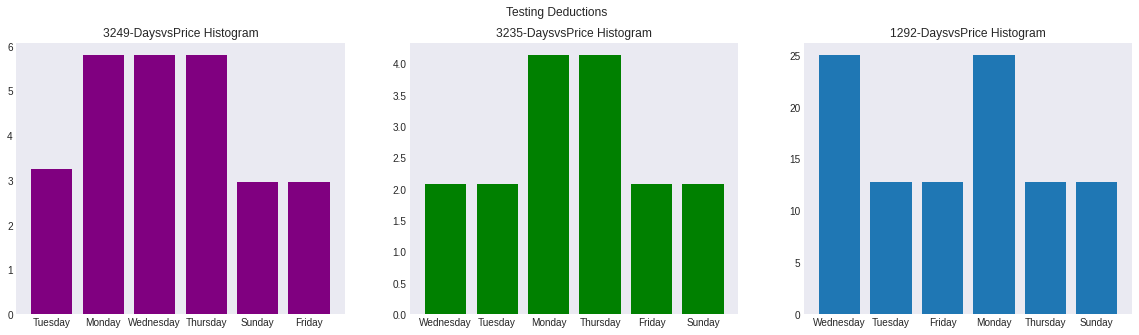

In [25]:
style.use('seaborn-dark')
df_prod1 = df1[df1.StockCode==3249]
df_prod2 = df1[df1.StockCode==3235]
df_prod3 = df1[df1.StockCode==1292]
#df_prod.head()
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(20,5))
fig.suptitle('Testing Deductions')
ax1.bar(df_prod1['Weekday'],df_prod1['UnitPrice'],color=['purple'])
ax1.set_title('3249-DaysvsPrice Histogram')
ax2.bar(df_prod2['Weekday'],df_prod2['UnitPrice'],color=['green'])
ax2.set_title('3235-DaysvsPrice Histogram')
ax3.bar(df_prod3['Weekday'],df_prod3['UnitPrice'])
ax3.set_title('1292-DaysvsPrice Histogram')

#Cleary Monday is vulnerable to price hike actually price gets doubled on Monday.

Text(0.5, 1.0, '1292-MonthvsPrice Histogram')

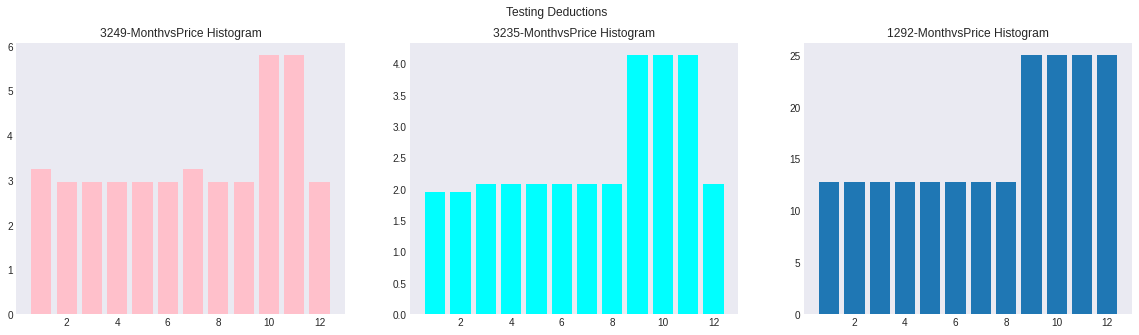

In [ ]:
style.use('seaborn-dark')
df_prod1 = df1[df1.StockCode==3249]
df_prod2 = df1[df1.StockCode==3235]
df_prod3 = df1[df1.StockCode==1292]
#df_prod.head()
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(20,5))
fig.suptitle('Testing Deductions')
ax1.bar(df_prod1['Month'],df_prod1['UnitPrice'],color=['pink'])
ax1.set_title('3249-MonthvsPrice Histogram')
ax2.bar(df_prod2['Month'],df_prod2['UnitPrice'],color=['cyan'])
ax2.set_title('3235-MonthvsPrice Histogram')
ax3.bar(df_prod3['Month'],df_prod3['UnitPrice'])
ax3.set_title('1292-MonthvsPrice Histogram')
# they increase price due to demand in the last 4-3 months especially in oct-nov, So categorizing months in bins of 3 or 4 seems right

Text(0.5, 1.0, '1292-Month Histogram')

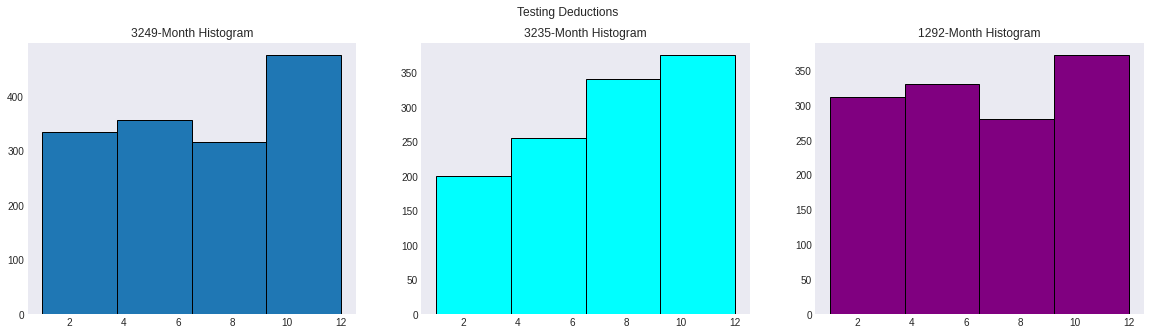

In [ ]:
style.use('seaborn-dark')
df_prod = df1[df1.StockCode==3249]
#df_prod.head()
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(20,5))
fig.suptitle('Testing Deductions')
ax1.hist(df_prod['Month'],bins=4,edgecolor='black')
ax1.set_title('3249-Month Histogram')
ax2.hist(df1[df1.StockCode==3235]['Month'],bins=4,edgecolor='black',color='cyan')
ax2.set_title('3235-Month Histogram')
ax3.hist(df1[df1.StockCode==1292]['Month'],bins=4,edgecolor='black',color='purple')
ax3.set_title('1292-Month Histogram')
#Divide months in bins of 4

Text(0.5, 1.0, '1292-CountryvsPrice barplot')

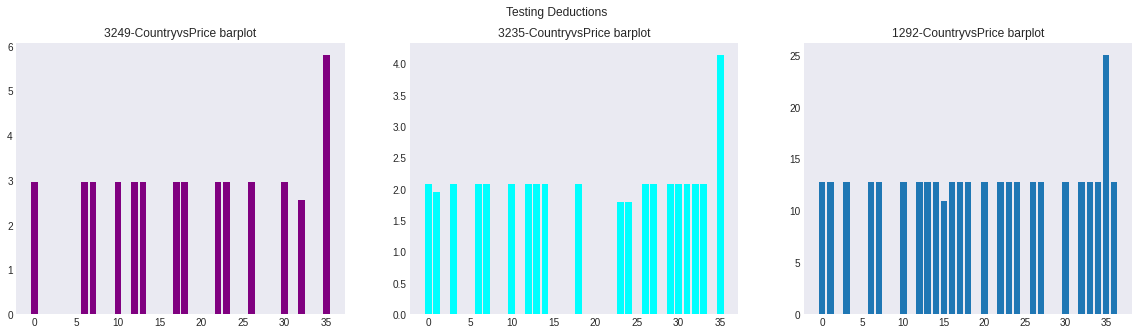

In [ ]:
style.use('seaborn-dark')
df_prod1 = df1[df1.StockCode==3249]
df_prod2 = df1[df1.StockCode==3235]
df_prod3 = df1[df1.StockCode==1292]
#df_prod.head()
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(20,5))
fig.suptitle('Testing Deductions')
ax1.bar(df_prod1['Country'],df_prod1['UnitPrice'],color=['purple'])
ax1.set_title('3249-CountryvsPrice barplot')
ax2.bar(df_prod2['Country'],df_prod2['UnitPrice'],color=['cyan'])
ax2.set_title('3235-CountryvsPrice barplot')
ax3.bar(df_prod3['Country'],df_prod3['UnitPrice'])
ax3.set_title('1292-CountryvsPrice barplot')
#Country cod e35 has double price ...and it is justified as most of the records are for country 35
#And not every product is sold in every country

Text(0.5, 1.0, '1292-CountryvsPrice barplot')

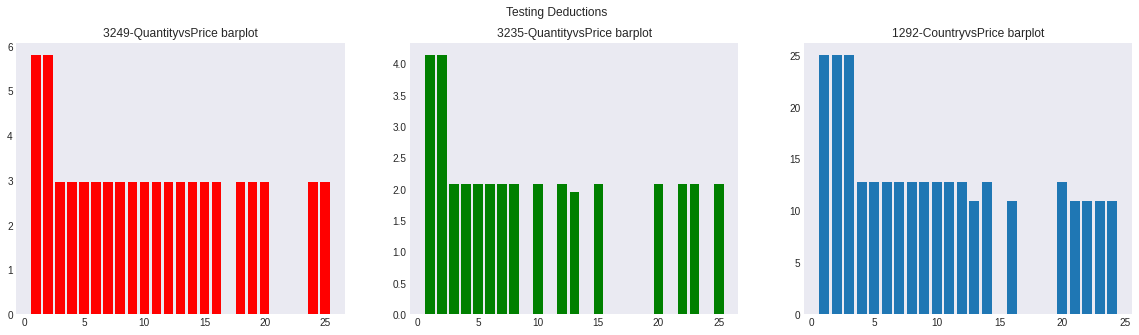

In [ ]:
style.use('seaborn-dark')
df_prod1 = df1[(df1.StockCode==3249) & (abs(df1.Quantity)<30) ]
df_prod2 = df1[(df1.StockCode==3235) & (abs(df1.Quantity)<30 )]
df_prod3 = df1[(df1.StockCode==1292) & (abs(df1.Quantity)<30 )]
#df_prod.head()
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(20,5))
fig.suptitle('Testing Deductions')
ax1.bar(abs(df_prod1['Quantity']),df_prod1['UnitPrice'],color=['red'])
ax1.set_title('3249-QuantityvsPrice barplot')
ax2.bar(abs(df_prod2['Quantity']),df_prod2['UnitPrice'],color=['green'])
ax2.set_title('3235-QuantityvsPrice barplot')
ax3.bar(abs(df_prod3['Quantity']),df_prod3['UnitPrice'])
ax3.set_title('1292-CountryvsPrice barplot')
#For buying 1 or 2 quantity price doubles

Text(0.5, 1.0, '1292-TimelightvsPrice Histogram')

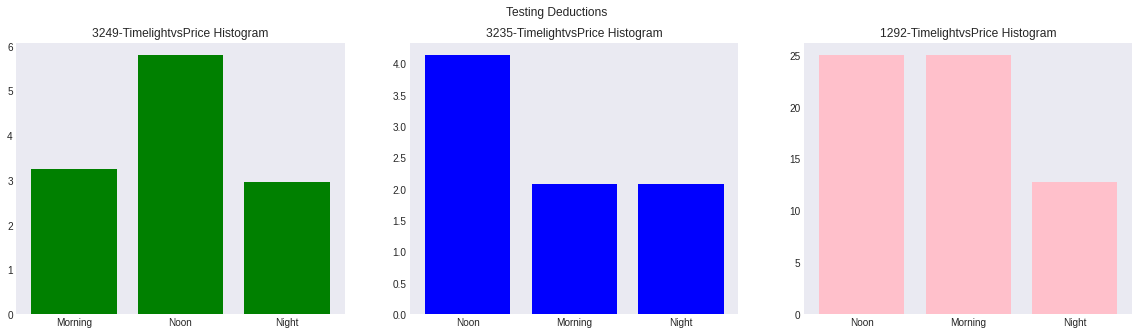

In [ ]:
style.use('seaborn-dark')
df_prod1 = df1[df1.StockCode==3249]
df_prod2 = df1[df1.StockCode==3235]
df_prod3 = df1[df1.StockCode==1292]
#df_prod.head()
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(20,5))
fig.suptitle('Testing Deductions')
ax1.bar(df_prod1['Timelight'],df_prod1['UnitPrice'],color=['green'])
ax1.set_title('3249-TimelightvsPrice Histogram')
ax2.bar(df_prod2['Timelight'],df_prod2['UnitPrice'],color=['blue'])
ax2.set_title('3235-TimelightvsPrice Histogram')
ax3.bar(df_prod3['Timelight'],df_prod3['UnitPrice'],color='pink')
ax3.set_title('1292-TimelightvsPrice Histogram')

#In noon price gets doubled.

In [ ]:
#Lets chec for correlation.
df1.drop(['InvoiceNo','Time',],axis=1,inplace=True)
corr = df1.corr()
corr

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day
StockCode,1.000000,-0.013230,-0.000942,0.020073,0.002887,0.006242,0.030964,0.065018,0.005046
Description,-0.013230,1.000000,0.000194,-0.000424,-0.005227,-0.014791,0.023590,0.009275,0.004880
Quantity,-0.000942,0.000194,1.000000,-0.000924,-0.002930,-0.008001,0.000746,-0.001970,-0.000066
UnitPrice,0.020073,-0.000424,-0.000924,1.000000,-0.004932,-0.005378,0.000838,-0.002478,-0.000975
CustomerID,0.002887,-0.005227,-0.002930,-0.004932,1.000000,0.388198,-0.037739,0.029939,-0.001384
Country,0.006242,-0.014791,-0.008001,-0.005378,0.388198,1.000000,-0.017584,0.022823,0.000217
Year,0.030964,0.023590,0.000746,0.000838,-0.037739,-0.017584,1.000000,-0.341664,0.168553
Month,0.065018,0.009275,-0.001970,-0.002478,0.029939,0.022823,-0.341664,1.000000,-0.117902
Day,0.005046,0.004880,-0.000066,-0.000975,-0.001384,0.000217,0.168553,-0.117902,1.000000


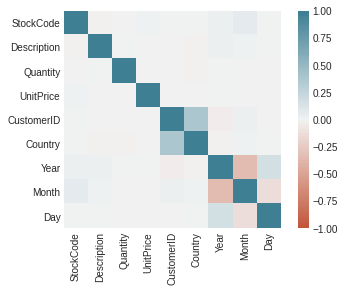

In [ ]:
sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
#No such Correlation

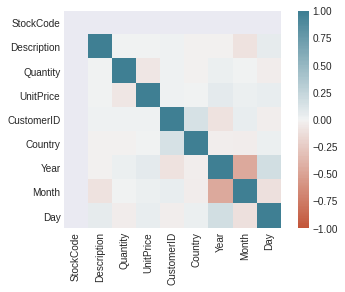

In [ ]:
#Lets try it for a single product 3249
corr = df1[df1.StockCode==3249].corr()
sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)

In [ ]:
#df1.drop(['CustomerID'],axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StockCode    284780 non-null  int64  
 1   Description  284780 non-null  int64  
 2   Quantity     284780 non-null  int64  
 3   UnitPrice    284780 non-null  float64
 4   Country      284780 non-null  int64  
 5   Year         284780 non-null  int64  
 6   Month        284780 non-null  int64  
 7   Day          284780 non-null  int64  
 8   Weekday      284780 non-null  object 
 9   Timelight    284780 non-null  object 
dtypes: float64(1), int64(7), object(2)
memory usage: 21.7+ MB


In [ ]:
df_prod3.Description.value_counts()

2780    1292
Name: Description, dtype: int64

In [43]:
df1.to_csv(Data_dir+'DataPrep1.csv',index=False)

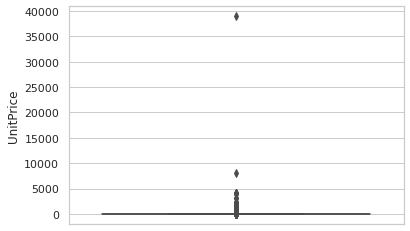

In [44]:
#df1.hist(['UnitPrice'],bins=10,figsize=(10,5))
sns.set_theme(style="whitegrid")
sns.boxplot(y=df1["UnitPrice"])
#Price heavily left skewed

In [ ]:
df_prod3.UnitPrice.value_counts()

12.75    1023
10.95     257
24.96       8
4.00        2
0.00        1
5.00        1
Name: UnitPrice, dtype: int64

In [45]:
#df_prod2['Quantity'] = abs(df_prod2.Quantity)
df1[df1.StockCode==3249].sort_values(by=['UnitPrice']).tail(10)
#df_prod2['UnitPrice'].value_counts()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Timelight,Weekday
227483,16165,3249,3716,320,3.20,17450.0,35,2011,11,14,Morning,Monday
180113,15327,3249,3716,224,3.20,17450.0,35,2011,11,3,Noon,Thursday
204045,1659,3249,3716,1010,3.24,17450.0,35,2011,1,11,Morning,Tuesday
32428,9229,3249,3716,128,3.24,17450.0,35,2011,7,12,Morning,Tuesday
259266,10015,3249,3716,480,3.24,17450.0,35,2011,7,28,Noon,Thursday
3146,14606,3249,3716,2,5.79,14096.0,35,2011,10,24,Noon,Monday
97355,16242,3249,3716,1,5.79,14096.0,35,2011,11,14,Noon,Monday
148290,17128,3249,3716,1,5.79,14096.0,35,2011,11,23,Noon,Wednesday
283643,14160,3249,3716,1,5.79,14096.0,35,2011,10,17,Noon,Monday
264296,15896,3249,3716,2,5.79,14096.0,35,2011,11,10,Noon,Thursday


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33165387b8>]],
      dtype=object)

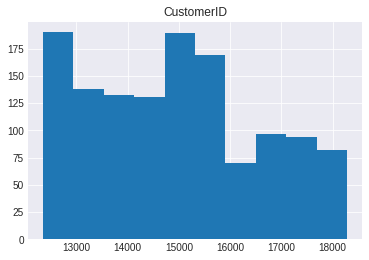

In [38]:
#df1.drop(['Date'],axis=1,inplace=True)
df_prod3.hist(['CustomerID'])

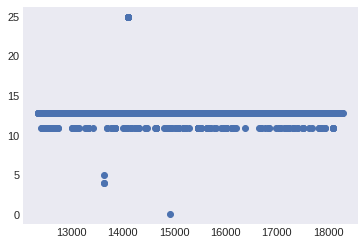

In [107]:
style.use('seaborn-dark')
df_prod1 = df1[df1.StockCode==3249]
#df_prod1['Quantity']= df_prod1.Quantity.abs()

df_prod2 = df1[df1.StockCode==3235]
df_prod3 = df1[df1.StockCode==1292]

plt.scatter(x='CustomerID',y='UnitPrice',data=df_prod3)